<a href="https://colab.research.google.com/github/Ruqyai/LangChain-DeepLearning.ai/blob/main/Chat_with_Any_Documents_Own_ChatGPT_with_LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chat with any documents using langchain

#### [Youtube video covering this notebook](https://youtu.be/TeDgIDqQmzs)

[OpenAI token limit](https://platform.openai.com/docs/models/gpt-4)  
OpenAI's embedding model has 1536 dimensions.  
After the data is turned into embeddings, they are stored in a vectorstore database, such as Pinecone, Chroma and Faiss, etc.  
Once the query is provided, the most relevant chunks of data is queried based on the similarity (semantic search)  


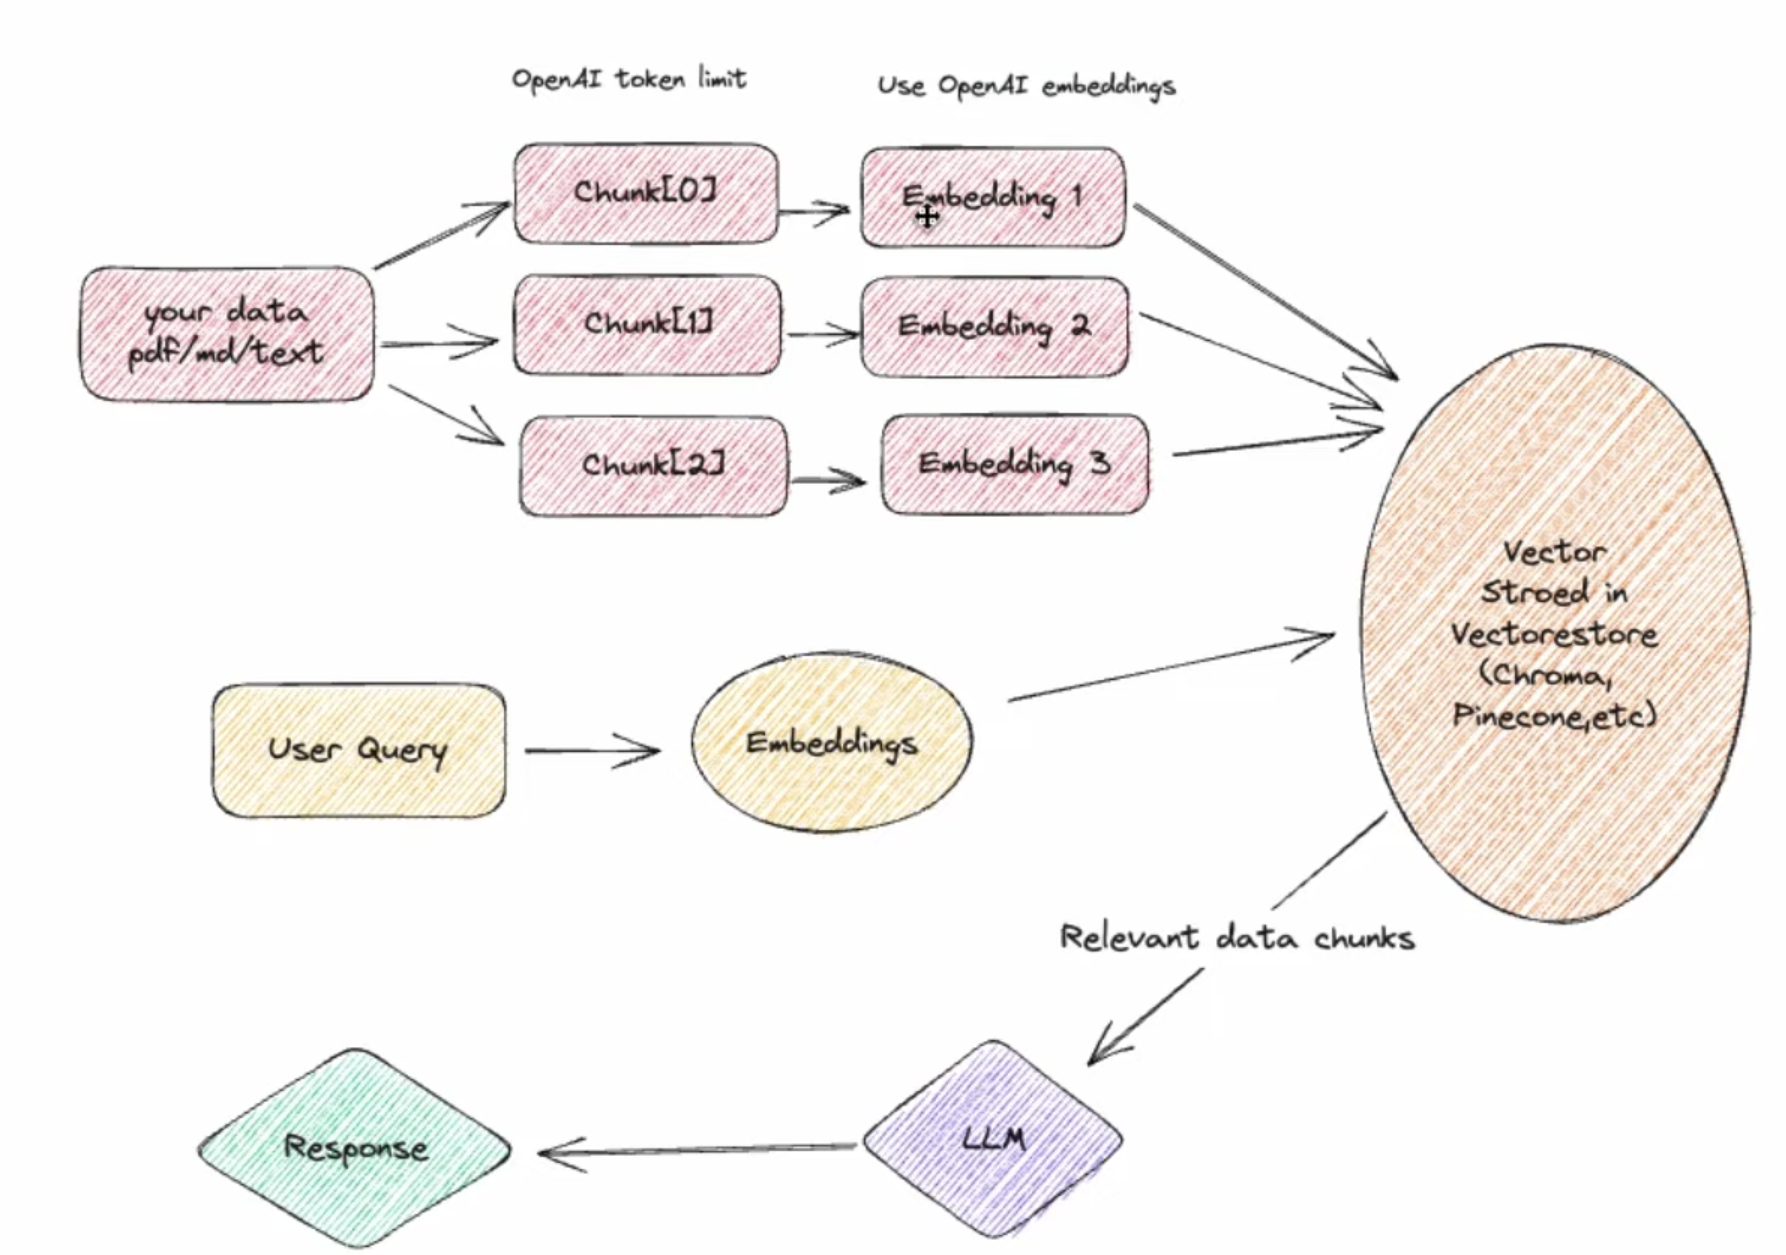

## Setup

In [ ]:
%%capture
!pip install openai langchain  tiktoken pypdf unstructured[local-inference] gradio chromadb

In [ ]:
!pip install watermark

In [ ]:
%reload_ext watermark
%watermark -a "Sudarshan Koirala" -vmp langchain,openai,chromadb

Author: Sudarshan Koirala

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

langchain: 0.0.281
openai   : 0.28.0
chromadb : 0.4.9

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 5.15.109+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [ ]:
import os
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Pinecone, Chroma
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.chains import ConversationalRetrievalChain
from langchain.chat_models import ChatOpenAI

In [ ]:
import os
import getpass
os.environ['OPENAI_API_KEY'] = getpass.getpass('OPENAI_API_KEY:')

OPENAI_API_KEY:··········


In [ ]:
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

[LangChain Document Loader](https://python.langchain.com/en/latest/modules/indexes/document_loaders.html)

In [ ]:
# !mkdir Documents
# upoad files to it

In [ ]:
from langchain.document_loaders import DirectoryLoader

pdf_loader = DirectoryLoader('/content/Documents/', glob="**/*.pdf")
readme_loader = DirectoryLoader('/content/Documents/', glob="**/*.md")
txt_loader = DirectoryLoader('/content/Documents/', glob="**/*.txt")

In [ ]:
#take all the loader
loaders = [pdf_loader, readme_loader, txt_loader]

#lets create document
documents = []
for loader in loaders:
    documents.extend(loader.load())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
print (f'You have {len(documents)} document(s) in your data')
print (f'There are {len(documents[0].page_content)} characters in your document')

You have 2 document(s) in your data
There are 65722 characters in your document


In [ ]:
documents[0]

Document(page_content='ةيبعشلا لاثملأا نم ةدمتسم ةيزاجحلا ةجهلل ةيوغللا صئاصخلا Linguistic features of Hijazi Dialect based on popular proverbs\n\nسبمس يعافر ريبز ةريمأ .د فرصلاو وحنلاو ةغللا مسق اهبادآو ةيبرعلا ةغللا ةيلك –\n\nةمركملا ةكمب ىرقلا مأ ةعماج\n\nDr. Ameerah Zubair Rofae Sambas Department of Language ,Syntax and Morphology College of Arabic Language and Literature - Umm Al Qura University\n\nةيبعشلا لاثملأا نم ةدمتسم ةيزاجحلا ةجهلل ةيوغللا صئاصخلا\n\nةيبعشلا لاثملأا نم ةدمتسم\n\nةيزاجحلا ةجهلل ةيوغللا صئاصخلا\n\nىلع لدي يقيثوت ءزج يهف ،زاجحلا لهأ ةايح يف ةريبك ةيمهأ ىدحإ دعت امك ،اهديلاقتو اهتاداع ةآرمو ،اهمكح ُّبلو ،اهبراجت ةصلاخ يهو ،مهريكفت طامنأ .لايجلأا هلقانتت اهثارت ظفحل لئاسولا ىوقأ\n\n)\n\nةيماعلا( ةيبعشلا لاثملأل\n\nةيقلاخلأاو ةينيدلا نيماضملا نم ريثكلا ةيزاجحلا ةيبعشلا لاثملأا نمضتت امك\n\n.ةيركفلاو ةيعامتجلااو\n\nاهرامثتساو\n\n،\n\nاهبيرغو ةيبرعلا ةغللا تادرفم ظفح يف ةيبعشلا لاثملأا رامثتسا نكميو\n\n.ةيزاجحلا ةجهللا ةسارد يف اضيأ\n\nاهتطساوب يتلا ةيزاجحلا ةجهلل 

## Split the Text from the documents

In [ ]:
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=40) #chunk overlap seems to work better
documents = text_splitter.split_documents(documents)
print(len(documents))

75


In [ ]:
documents[0]

Document(page_content='GPT4All\n\n\n\nJ: An Apache\n\n\n\n2 Licensed Assistant\n\n\n\nStyle Chatbot\n\nYuvanesh Anand\n\nyuvanesh@nomic.ai\n\nZach Nussbaum\n\nzach@nomic.ai\n\nBrandon Duderstadt\n\nbrandon@nomic.ai\n\nBenjamin M. Schmidt\n\nben@nomic.ai\n\nAdam Treat\n\ntreat.adam@gmail.com\n\nAndriy Mulyar\n\nandriy@nomic.ai\n\nAbstract', metadata={'source': '/content/Documents/gpt4all.pdf'})

In [ ]:
documents[1]

Document(page_content='.ةيزاجحلا ةجهللا ةسارد يف اضيأ\n\nاهتطساوب يتلا ةيزاجحلا ةجهلل ةس يف تلجت امك ،ةيزاجحلا ةجهللا يف ةعئاشلا ةيوغللا رهاوظلا نم ريثكلا ىلع فرعتلا عيطتسن نمو ،ةهج نم اذه .اهتلالادو ظافللأا قاقتشاو ،لمجلا بيكرتو ،يفرصلا ماظنلاو ،تاوصلأا ةيبرعلا لاثملأا ةغل ةنر ةيملعلا ةرورضلا تضتقا اذإ ةساردلا هذه موقت ىرخأ ةهج .ةهباشملا ةيزاجحلا اهتاوخأو ةحيصلا\n\nاقمب\n\n–\n\nارد يه ةيزاجحلا ةيبعشلا لاثملأا ةغل ةسارد َّنإف اذل\n\n–\n\nةغللا وأ ،ةيماعلا ةغللا اهيف مدختست ثيح ،ةفورعم ةيوغل صئاصخ ةيبعشلا لاثملألو\n\n.اًعم ةيماعلاو ىحصفلا ةغللا نم اطيلخ مدختست امك ،عمتجملا يف ةجرادلا\n\n،ةيزاجحلا لاثملأا نع تبتك ي ةسارد اهتساردب ىنعٌت نكت ملو .اهنيماضم ركذو ،اهحرشو اهعمج ثيح نم اهتلوانت اهنأ لاإ .ةيوغل\n\nتلا ثحابملاو بتكلا نم ديدعلا كانه َّنأ نم مغرلا ىلعو\n\nزاجحلا يف ةيبعشلا لاثملأا ةغل صئاصخ ةساردل ةعضاوتم ةلواحم يه ةساردلا هذهو\n\n:ةيتلآا تايوتسملا يف .\n\n) ةدجو ،ةرونملا ةنيدملاو ،ةمركملا ةكم(\n\n).\n\nربنلا عضاوم ).\n\nنيللا تاوصأ – عومجلاو ىنثملا غيص بارعلإا ).\n\n).', metadata=

## Embeddings and storing it in Vectorestore

In [ ]:
embeddings = OpenAIEmbeddings()

### Using Chroma for storing vectors

In [ ]:
from langchain.vectorstores import Chroma

In [ ]:
vectorstore = Chroma.from_documents(documents, embeddings)

### Using pinecone for storing vectors

In [ ]:
%%capture
!pip install pinecone-client

- [Pinecone langchain doc](https://python.langchain.com/en/latest/modules/indexes/vectorstores/examples/pinecone.html?highlight=pinecone#pinecone
)
- What is [vectorstore](https://www.pinecone.io/learn/vector-database/)
- Get your pinecone api key and env -> https://app.pinecone.io/

In [ ]:
import os
import getpass
PINECONE_API_KEY = getpass.getpass('Pinecone API Key:')

In [ ]:
PINECONE_ENV = getpass.getpass('Pinecone Environment:')

In [ ]:
import pinecone

# initialize pinecone
pinecone.init(
    api_key=PINECONE_API_KEY,  # find at app.pinecone.io
    environment=PINECONE_ENV  # next to api key in console
)

index_name = "fyler-index"

vectorstore = Pinecone.from_documents(documents, embeddings, index_name=index_name)

In [ ]:
# if you already have an index, you can load it like this
import pinecone
from tqdm.autonotebook import tqdm

# initialize pinecone
pinecone.init(
    api_key=PINECONE_API_KEY,  # find at app.pinecone.io
    environment=PINECONE_ENV  # next to api key in console
)

index_name = "langchain-demo"
vectorstore = Pinecone.from_existing_index(index_name, embeddings)

#### We had 23 documents so there are 23 vectors being created in Pinecone.

In [ ]:
query = "ما عدد اللهجات العربية"
docs = vectorstore.similarity_search(query)

In [ ]:
len(docs) #it went on and search on the 4 different vectors to find the similarity

4

In [ ]:
print(docs[0].page_content)

In [ ]:
print(docs[1].page_content)

Building on the GPT4All dataset, we curated the GPT4All-J dataset by augmenting the origi- nal 400k GPT4All examples with new samples encompassing additional multi-turn QA samples and creative writing such as poetry, rap, and short stories. We designed prompt templates to create different scenarios for creative writing. The cre- ative prompt template was inspired by Mad Libs style variations of ‘Write a [creative story type] about [NOUN] in the style of [PERSON]‘. In ear- lier versions of GPT4All, we found that rather than writing actual creative content, the model would discuss how it would go about writing the content. Training on this new dataset allows GPT4All-J to write poems, songs, and plays with increased com- petence.


## Now the langchain part (Chaining with Chat History) --> With One line of Code (Fantastic)
- There are many chains but we use this [link](https://python.langchain.com/en/latest/modules/chains/index_examples/chat_vector_db.html)

In [ ]:
from langchain.llms import OpenAI

In [ ]:
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k":2})
qa = ConversationalRetrievalChain.from_llm(OpenAI(temperature=0), retriever)

In [ ]:
chat_history = []
query = "ابغى اعرف معني لهجة "
result = qa({"question": query, "chat_history": chat_history})
result["answer"]

In [ ]:
chat_history.append((query, result["answer"]))
chat_history

[('How much is spent for training the gpt4all model?', ' $200')]

In [ ]:
query = "ماهي اللهجات"
result = qa({"question": query, "chat_history": chat_history})
result["answer"]

## Create a chatbot with memory with simple widgets

In [ ]:
from IPython.display import display
import ipywidgets as widgets

In [ ]:
chat_history = []

def on_submit(_):
    query = input_box.value
    input_box.value = ""

    if query.lower() == 'exit':
        print("Thanks for the chat!")
        return

    result = qa({"question": query, "chat_history": chat_history})
    chat_history.append((query, result['answer']))

    display(widgets.HTML(f'<b>User:</b> {query}'))
    display(widgets.HTML(f'<b><font color="Orange">Chatbot:</font></b> {result["answer"]}'))

print("Chat with your data. Type 'exit' to stop")

input_box = widgets.Text(placeholder='Please enter your question:')
input_box.on_submit(on_submit)

display(input_box)

## Gradio Part (Building the [chatbot like UI](https://gradio.app/docs/#chatbot))

### Gradio sample example

In [ ]:
import gradio as gr
import random

with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    clear = gr.Button("Clear")

    def respond(message, chat_history):
        print(message)
        print(chat_history)
        bot_message = random.choice(["How are you?", "I love you", "I'm very hungry"])
        chat_history.append((message, bot_message))
        print(chat_history)
        return "", chat_history

    msg.submit(respond, [msg, chatbot], [msg, chatbot])
    clear.click(lambda: None, None, chatbot, queue=False)

demo.launch(debug=True, share=True)

### Gradio langchain example

In [ ]:
import gradio as gr
with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    clear = gr.Button("Clear")

    def respond(user_message, chat_history):
        print(user_message)
        print(chat_history)
        # Get response from QA chain
        response = qa({"question": user_message, "chat_history": chat_history})
        # Append user message and response to chat history
        chat_history.append((user_message, response["answer"]))
        print(chat_history)
        return "", chat_history

    msg.submit(respond, [msg, chatbot], [msg, chatbot], queue=False)
    clear.click(lambda: None, None, chatbot, queue=False)

demo.launch(debug=True, share=True)